# TeV_spectrum

Description of TeV columns - https://github.com/gammapy/gamma-cat/blob/master/output/gammacat.ecsv

In [1]:
import pandas as pd
import math
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord
from pandas.plotting import scatter_matrix
from scipy.interpolate import interp1d

In this notebook catalog_TeV is an intersection of gev, tev and simbad catalogs.

In [2]:
catalog_TeV = pd.read_csv("markeddata/gevtevsimbad.txt", sep='\t', index_col=0)

In [3]:
columns_TeV = [
    'tev_sed_dnde',
    'tev_sed_dnde_err',
    'tev_sed_dnde_errn',
    'tev_sed_dnde_errp',
    'tev_sed_dnde_ul',
    'tev_sed_e_max',
    'tev_sed_e_min',
    'tev_sed_e_ref',
    'tev_sed_n_points',
    'tev_sed_n_ul',
    'tev_sed_reference_id',
    'tev_seen_by',
    'tev_significance',
    'tev_source_id',
    'tev_spec_dnde_1TeV',
    'tev_spec_dnde_1TeV_err',
    'tev_spec_ecpl_e_cut',
    'tev_spec_ecpl_e_cut_err',
    'tev_spec_ecpl_e_cut_err_sys',
    'tev_spec_ecpl_e_ref',
    'tev_spec_ecpl_index',
    'tev_spec_ecpl_index_err',
    'tev_spec_ecpl_index_err_sys',
    'tev_spec_ecpl_norm',
    'tev_spec_ecpl_norm_err',
    'tev_spec_ecpl_norm_err_sys',
    'tev_spec_eflux_1TeV_10TeV',
    'tev_spec_eflux_1TeV_10TeV_err',
    'tev_spec_erange_max',
    'tev_spec_erange_min',
    'tev_spec_flux_1TeV',
    'tev_spec_flux_1TeV_crab',
    'tev_spec_flux_1TeV_crab_err',
    'tev_spec_flux_1TeV_err',
    'tev_spec_pl2_e_max',
    'tev_spec_pl2_e_min',
    'tev_spec_pl2_flux',
    'tev_spec_pl2_flux_err',
    'tev_spec_pl2_flux_err_sys',
    'tev_spec_pl2_index',
    'tev_spec_pl2_index_err',
    'tev_spec_pl2_index_err_sys',
    'tev_spec_pl_e_ref',
    'tev_spec_pl_index',
    'tev_spec_pl_index_err',
    'tev_spec_pl_index_err_sys',
    'tev_spec_pl_norm',
    'tev_spec_pl_norm_err',
    'tev_spec_pl_norm_err_sys',
    'tev_spec_theta',
    'tev_spec_type',
]

In [4]:
catalog_TeV[['s_MAIN_ID', 'tev_sed_e_ref', 'tev_sed_dnde', 'tev_sed_dnde_err']]

,s_MAIN_ID,tev_sed_e_ref,tev_sed_dnde,tev_sed_dnde_err
0,b'GCIRS 8',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
1,b'[MCD2010] 13',[ 0.39789999 0.56220001 0.79430002 1.12...,[ 3.23300002e-12 4.40699994e-13 2.9500000...,[ nan nan nan nan nan nan nan nan nan ...
2,b'[MCD2010] 13',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
3,b'Schulte 21',[ 0.79000002 1.25999999 2. 3.16...,[ 1.69999995e-12 4.99999998e-13 2.2999999...,[ 4.99999998e-13 1.49999994e-13 5.9999998...
4,b'2FGL J1019.0-5856',[ 0.40220299 0.79795301 1.23277998 1.90...,[ 2.25568609e-12 3.47791213e-13 2.2703089...,[ nan nan nan nan nan nan nan nan nan ...
5,b'[KRL2007b] 332',[ 0.73806798 1.29738998 2.29364991 4.04...,[ 1.83209992e-11 8.44120000e-12 1.8995499...,[ nan nan nan nan nan nan nan nan nan ...
6,b'V* V479 Sct',[ 0.277619 0.43024501 0.691719 1.11...,[ 3.43570006e-10 1.29701000e-10 4.9657198...,[ nan nan nan nan nan nan nan nan nan ...
7,b'LS I +61 303',[ 0.59841502 0.87828797 1.28896999 1.89...,[ 3.22340006e-12 9.27542006e-13 2.3246899...,[ nan nan nan nan nan nan nan nan nan ...
8,b'CXOU J095550.1+694034',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
9,b'SSTGC 519103',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...


Axe x - tev_sed_e_ref

Axe y - tev_sed_dnde

Red lines represent errors of tev_sed_dnde

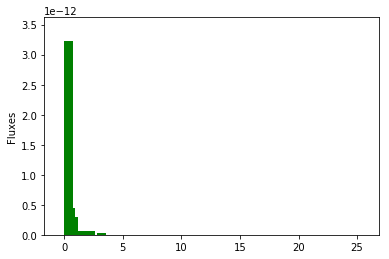

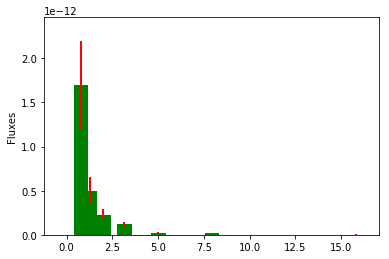

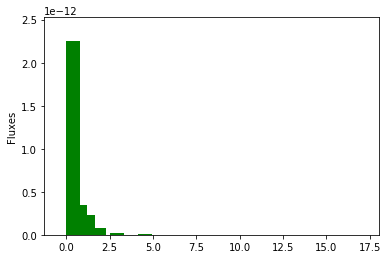

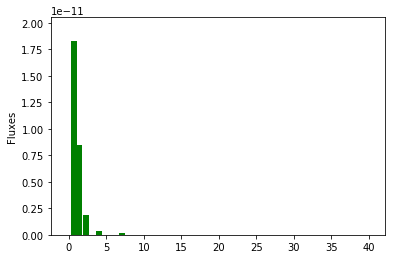

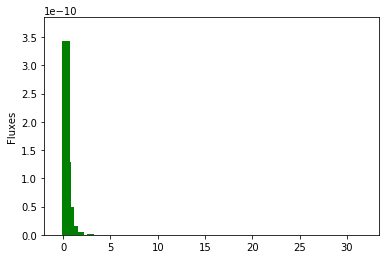

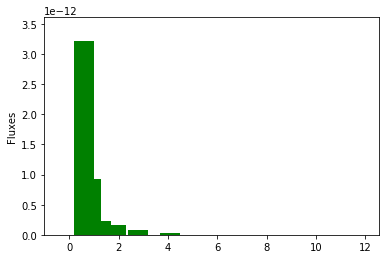

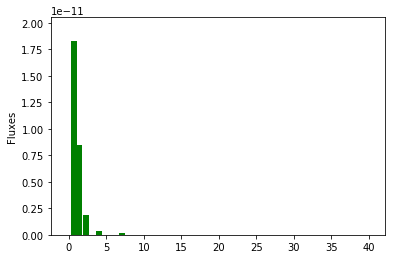

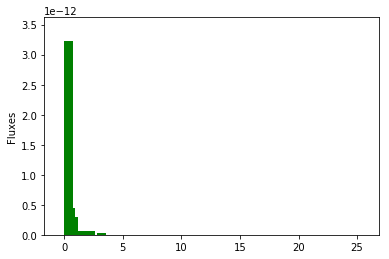

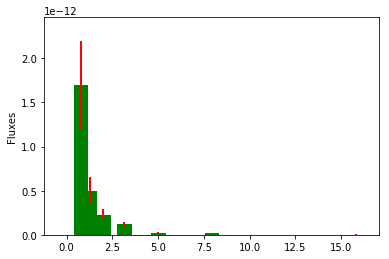

In [5]:
for idx in range(len(catalog_TeV)):
    plt.clf()
    x = catalog_TeV.loc[idx, 'tev_sed_e_ref']
    y = catalog_TeV.loc[idx, 'tev_sed_dnde']
    y_err = catalog_TeV.loc[idx,'tev_sed_dnde_err']

    #in catalog this columns are in string format
    #these three lines converge to a list of floats and nan -s
    x = [float(xi) for xi in x[1:-1].split()]
    y = [float(yi) for yi in y[1:-1].split()]
    y_err = [float(y_erri) for y_erri in y_err[1:-1].split()]
    
    
    #replace nan -s by zeros
    x = [0 if math.isnan(xi) else xi for xi in x]
    y = [0 if math.isnan(yi) else yi for yi in y]
    y_err = [0 if math.isnan(y_erri) else y_erri for y_erri in y_err]
    
    #verify that a spectrum is not empty 
    if max(x) > 0: 
        fig = plt.figure()
        ax = fig.add_subplot(111)

        ## the bars
        rects1 = ax.bar(x, y,
                color='green',
                yerr=y_err,
                error_kw=dict(elinewidth=2,ecolor='red'))

        # axes and labels
        ax.set_ylim(0,(max(y)+max(y_err))*1.12)
        ax.set_ylabel('Fluxes')
        #ax.set_xticks(x)
        plt.show()

Logarithmic scale :

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


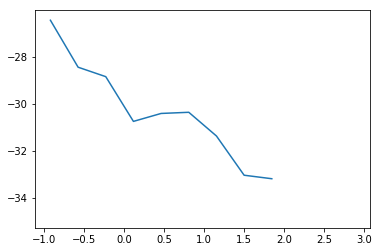

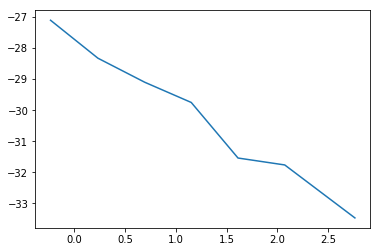

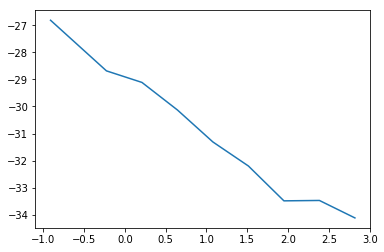

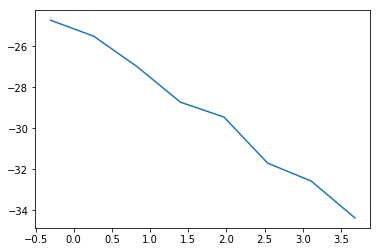

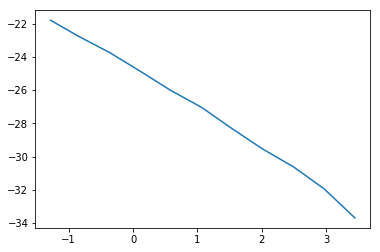

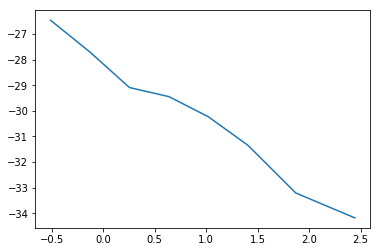

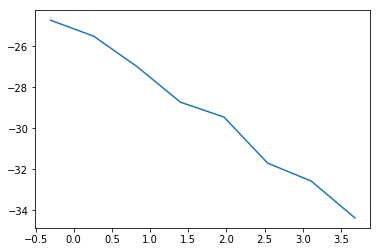

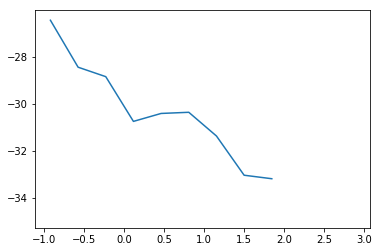

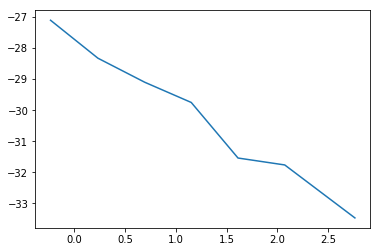

In [6]:
for idx in range(len(catalog_TeV)):
    #the same cycle as before, plotting logarithmes
    plt.clf()
    x = catalog_TeV.loc[idx, 'tev_sed_e_ref']
    y = catalog_TeV.loc[idx, 'tev_sed_dnde']
    y_err = catalog_TeV.loc[idx,'tev_sed_dnde_err']


    x = [float(xi) for xi in x[1:-1].split()]
    y = [float(yi) for yi in y[1:-1].split()]
    y_err = [float(y_erri) for y_erri in y_err[1:-1].split()]
    
    x = [0 if math.isnan(xi) else xi for xi in x]
    y = [0 if math.isnan(yi) else yi for yi in y]
    y_err = [0 if math.isnan(y_erri) else y_erri for y_erri in y_err]
    if max(x) > 0: 
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # axes and labels
        ax.plot(np.log(x), np.log(y))
        #ax.set_xticks(x)
        plt.show()